# Here we wanna check if the target column (SalePrice) is skewed and visualizing to know if we need a log-transform.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew


# Now, let Load Kaggle training data

In [2]:
df = pd.read_csv("../data/raw/heart_failure_clinical_records_dataset.csv")
df.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


# Here, we're extract the target column (serum_creatinine)

In [3]:
y = df["serum_creatinine"] # Here is the target column
print("Number of samples:", len(y))


Number of samples: 299


# Now, let's Plot the raw Target (SalePrice) distribution

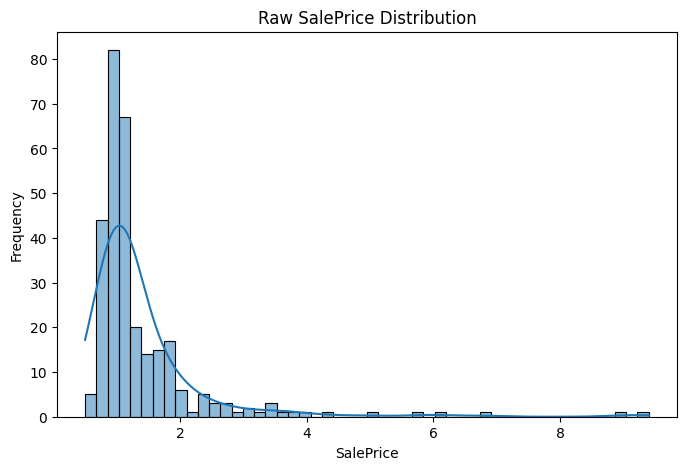

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(y, bins=50, kde=True)
plt.title("Raw SalePrice Distribution")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()


# let Compute skewness

## Skewness measures asymmetry of a distribution.

| Skewness value | Meaning                                |
| -------------- | -------------------------------------- |
| ~0             | symmetric (good for linear regression) |
| > 1            | highly right-skewed (problematic) , so NEED A LOG TRANSFORM     |


If extreme values (Saleprice) are:

    larger than most data → right-skew

    smaller than most data → left-skew


So in this case, we see that , it's right-skew cause we have some extreme Saleprice like, 550 000, 620 000, and around 800 000

In [5]:
print("Skewness:", skew(y))


Skewness: 4.433610162782361


# Plot log-transformed Target (serum_creatinine)

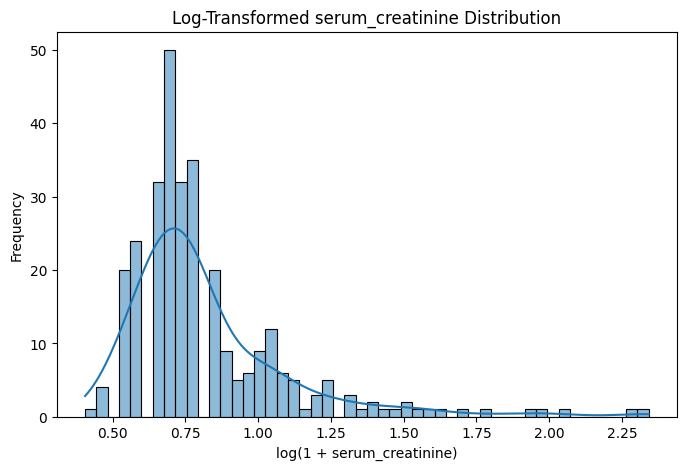

In [7]:
y_log = np.log1p(y) # Hee i'm applying the log transformation to the y

plt.figure(figsize=(8,5))
sns.histplot(y_log, bins=50, kde=True)
plt.title("Log-Transformed serum_creatinine Distribution")
plt.xlabel("log(1 + serum_creatinine)")
plt.ylabel("Frequency")
plt.show()


# Skewness after log

In [8]:
print("Skewness after log:", skew(y_log))


Skewness after log: 2.301585771885941
